This python script is used to generate shorelines of the missing years with methods named DSAS, as descibed in [Calculating shoreline changes websites by NOAA](https://shoreline.noaa.gov/apps/index.html). DSAS returns shoreline change rates on the transects perpendicular on a arbitrary baseline between two surveyed years. We use the change rate to estimate the location of the shoreline in the missing years.

In [1]:
import geojson

In [13]:
import numpy as np
from pyproj import Geod

In [4]:
#read geojson flies
with open("1860_coastline.geojson") as f:
    gj = geojson.load(f)
features = gj['features']

In [12]:
features[0]["geometry"]["coordinates"]

[[[-124.117626, 46.877113],
  [-124.117716, 46.877859],
  [-124.118055, 46.878537],
  [-124.118327, 46.879171],
  [-124.11853, 46.879736],
  [-124.118847, 46.880573],
  [-124.119186, 46.88141],
  [-124.119503, 46.88245],
  [-124.119684, 46.883332],
  [-124.119548, 46.884304],
  [-124.119706, 46.885051],
  [-124.119661, 46.886001],
  [-124.119751, 46.887018],
  [-124.119706, 46.887606],
  [-124.11939, 46.888262],
  [-124.119186, 46.889167],
  [-124.119209, 46.889687],
  [-124.118847, 46.890162],
  [-124.118824, 46.891225],
  [-124.118508, 46.891926],
  [-124.118168, 46.892944],
  [-124.117874, 46.894391],
  [-124.117445, 46.895409],
  [-124.116902, 46.897127],
  [-124.116088, 46.898303],
  [-124.115839, 46.899095],
  [-124.115126, 46.900499],
  [-124.114172, 46.9017],
  [-124.112971, 46.902937],
  [-124.111628, 46.903997],
  [-124.109897, 46.90488],
  [-124.108492, 46.905178],
  [-124.107246, 46.905552],
  [-124.106222, 46.905799],
  [-124.104843, 46.906046],
  [-124.103783, 46.906011],

In [11]:
len(features[0]["geometry"]["coordinates"])

2

In [6]:
from shapely.geometry import LineString

In [274]:
#create baselines on the landward side of the shoreline.

baseline={
    "type": "LineString", 
    "coordinates": [
        [-124.109126, 46.858710], [-124.117791, 46.887093], [-124.115168, 46.896011],[-124.108546,46.895850],[-124.105023,46.88691],[-124.104452,46.858904]
    ]
}

In [275]:
#divide the first segment of the baseline into 100 points, divide the second segment into 50 points, divide the third segment into 30, divide the fourth segment into 50, divide the fifth segment into 100.
#extract the coordinates of teh baseline
baseline_coordinates=baseline["coordinates"]

#create a dictionary to store the coordinates of the foot of the transects
transects_foots={"foots_index_0":[],"foots_index_1":[],"foots_index_2":[],"foots_index_3":[],"foots_index_4":[]}

#transects_foot=[]
for i,coordinate in enumerate(baseline_coordinates):
    if i==0:
        transects_foots["foots_index_0"].append(np.linspace(baseline_coordinates[i],baseline_coordinates[i+1],100).tolist())
    elif i==1:
        transects_foots["foots_index_1"].append(np.linspace(baseline_coordinates[i],baseline_coordinates[i+1],50).tolist())
    elif i==2:
        transects_foots["foots_index_2"].append(np.linspace(baseline_coordinates[i],baseline_coordinates[i+1],30).tolist())
    elif i==3:
        transects_foots["foots_index_3"].append(np.linspace(baseline_coordinates[i],baseline_coordinates[i+1],50).tolist())
    elif i==4:
        transects_foots["foots_index_4"].append(np.linspace(baseline_coordinates[i],baseline_coordinates[i+1],100).tolist())

{'foots_index_0': [[[-124.109126, 46.85871],
   [-124.10921352525253, 46.8589966969697],
   [-124.10930105050505, 46.85928339393939],
   [-124.10938857575758, 46.859570090909095],
   [-124.1094761010101, 46.85985678787879],
   [-124.10956362626263, 46.860143484848486],
   [-124.10965115151515, 46.86043018181818],
   [-124.10973867676768, 46.86071687878788],
   [-124.1098262020202, 46.86100357575758],
   [-124.10991372727273, 46.861290272727274],
   [-124.11000125252525, 46.86157696969697],
   [-124.11008877777778, 46.86186366666667],
   [-124.1101763030303, 46.86215036363637],
   [-124.11026382828283, 46.86243706060606],
   [-124.11035135353535, 46.86272375757576],
   [-124.11043887878787, 46.86301045454545],
   [-124.1105264040404, 46.863297151515155],
   [-124.11061392929294, 46.86358384848485],
   [-124.11070145454546, 46.863870545454546],
   [-124.11078897979799, 46.86415724242424],
   [-124.11087650505051, 46.864443939393944],
   [-124.11096403030304, 46.86473063636364],
   [-124.

325 transects in total

In [81]:
#this is a test cell for pyproj
from pyproj import Geod
g=Geod(ellps='clrk66')
boston_lat = 42.+(15./60.); boston_lon = -71.-(7./60.)
portland_lat = 45.+(31./60.); portland_lon = -123.-(41./60.)
newyork_lat = 40.+(47./60.); newyork_lon = -73.-(58./60.)
london_lat = 51.+(32./60.); london_lon = -(5./60.)
# compute forward and back azimuths, plus distance
# between Boston and Portland.
az12,az21,dist = g.inv(boston_lon,boston_lat,portland_lon,portland_lat)

In [82]:
print(az12,az21)

-66.5305947876623 75.65363415556968


In [80]:
75.65384304856798+180

255.65384304856798

In [90]:
geod = Geod(ellps='WGS84')
line=[(-124.58742500299087, 46.71300429114215),(-124.5875125282434, 46.713290988111844)]
lon1, lat1 = line[0]
lon2, lat2 = line[1]
f_azimuth, b_azimuth, _ = geod.inv(lon1, lat1, lon2, lat2)
if b_azimuth<270:
    azimuth=b_azimuth+90
else:
    azimuth=b_azimuth-270
    
distance = 5
offset_lon1, offset_lat1, _ = geod.fwd(lon1, lat1, azimuth, distance * 1609.34)
offset_lat1, offset_lon1

(46.71151629089728, -124.59772385448352)

In [89]:
geod.inv(lon1, lat1, lon2, lat2, radians=True)

(nan, nan, nan)

In [276]:
from pyproj import Geod

# Create a Geod object with the WGS-84 ellipsoid
geod = Geod(ellps='WGS84')

#Here the distance is in miles

def transect_line(line, distance):
    # Extract the two points of the line
    lon1, lat1 = line[0]
    lon2, lat2 = line[1]

    # Calculate the azimuth of the line
    f_azimuth, b_azimuth, _ = geod.inv(lon1, lat1, lon2, lat2)

    # Calculate the azimuth of the offset line, because we want to transects to be perpendicular to the second point of the baseline, we need to get the azimuth from the second point to the first point

    if b_azimuth<270:
        azimuth=b_azimuth+90
    else:
        azimuth=b_azimuth-270

    # Calculate the coordinates of the points away from the original line

    offset_lon1, offset_lat1, _ = geod.fwd(lon1, lat1, azimuth, distance * 1609.34)
    offset_lon2, offset_lat2, _ = geod.fwd(lon2, lat2, azimuth, distance * 1609.34)

    # Return the offset line as a tuple of two longitude and latitude coordinates
    return [(lon2, lat2), (offset_lon2, offset_lat2)]



transect_line([[-124.58742500299087, 46.71300429114215],[-124.5875125282434, 46.713290988111844]],1)


[(-124.5875125282434, 46.713290988111844),
 (-124.60810977403874, 46.7103140605357)]

In [277]:
len(baseline_coordinates)

6

In [105]:
[transects_foots["foots_index_0"][0][0],transects_foots["foots_index_0"][0][1]]

[[-124.109126, 46.85871], [-124.10921352525253, 46.8589966969697]]

In [104]:
len(transects_foots["foots_index_4"])

1

In [278]:
transects_perp={"trans_index_0":[],"trans_index_1":[],"trans_index_2":[],"trans_index_3":[],"trans_index_4":[]}

for i in range(len(baseline_coordinates)-1):      #because the basline is made of 5 segments with 6 points, -1 is required
    dict_ind_trans="trans_index_"+str(i)
    dict_ind_ft="foots_index_"+str(i)
    for j in range(len(transects_foots[dict_ind_ft][0])-1):
        transects_perp[dict_ind_trans].append(transect_line([transects_foots[dict_ind_ft][0][j],transects_foots[dict_ind_ft][0][j+1]],5))      #the transect is 5 miles in length

In [279]:
transects_foots["foots_index_2"]

[[[-124.115168, 46.896011],
  [-124.1149396551724, 46.896005448275865],
  [-124.11471131034483, 46.89599989655173],
  [-124.11448296551724, 46.895994344827585],
  [-124.11425462068965, 46.89598879310345],
  [-124.11402627586207, 46.89598324137931],
  [-124.11379793103448, 46.895977689655176],
  [-124.11356958620689, 46.89597213793104],
  [-124.1133412413793, 46.895966586206896],
  [-124.11311289655173, 46.89596103448276],
  [-124.11288455172414, 46.89595548275862],
  [-124.11265620689655, 46.89594993103449],
  [-124.11242786206897, 46.89594437931035],
  [-124.11219951724138, 46.89593882758621],
  [-124.11197117241379, 46.89593327586207],
  [-124.11174282758621, 46.895927724137934],
  [-124.11151448275862, 46.8959221724138],
  [-124.11128613793103, 46.895916620689654],
  [-124.11105779310346, 46.89591106896552],
  [-124.11082944827587, 46.89590551724138],
  [-124.11060110344827, 46.895899965517245],
  [-124.1103727586207, 46.89589441379311],
  [-124.11014441379311, 46.895888862068965],


In [280]:
transects_perp["trans_index_2"]

[[(-124.1149396551724, 46.896005448275865),
  (-124.11119149849489, 46.9683421478757)],
 [(-124.11471131034483, 46.89599989655173),
  (-124.11096315444884, 46.96833659623163)],
 [(-124.11448296551724, 46.895994344827585),
  (-124.11073481039146, 46.96833104458726)],
 [(-124.11425462068965, 46.89598879310345),
  (-124.11050646634564, 46.9683254929432)],
 [(-124.11402627586207, 46.89598324137931),
  (-124.11027812229369, 46.968319941298965)],
 [(-124.11379793103448, 46.895977689655176),
  (-124.1100497782422, 46.96831438965475)],
 [(-124.11356958620689, 46.89597213793104),
  (-124.10982143420226, 46.968308838010834)],
 [(-124.1133412413793, 46.895966586206896),
  (-124.10959309014459, 46.96830328636646)],
 [(-124.11311289655173, 46.89596103448276),
  (-124.10936474609858, 46.96829773472239)],
 [(-124.11288455172414, 46.89595548275862),
  (-124.1091364020412, 46.96829218307804)],
 [(-124.11265620689655, 46.89594993103449),
  (-124.10890805800123, 46.96828663143411)],
 [(-124.1124278620689

Now we have the transects, i.e., the profiles along the shoreline, then we should move to find out the intersections of the transects and historical shorelines.

In [189]:
#we only have 1860 shorelines now, and we need to import more shorelines. We will first import the shoreline of 1911
with open("f_1911_coastline.geojson") as f:
    gj_1911 = geojson.load(f)
features_1911 = gj_1911['features']

In [190]:
#import the 1911 shoreline data
len(features_1911)

646

## The 1911 feature is a huge dataset, it has 646 features, which includes shorelines that we do not need for now.

# Warning: 

We do not need it for now, but we may need it in the future. We are currently only focusing on the Westport, but the 1911 features also include the shorelines of other areas that we will use later, such as Ocean Shore and Washaway Beach.

In [118]:
features_1911[0]['geometry']['coordinates'][0][0][0]

-124.027818

In [196]:
from shapely.geometry import MultiLineString, Polygon

# Define the MultiLineString and Polygon geometries
mls = MultiLineString([((0, 0), (1, 1)), ((1, 1), (2, 2)), ((3, 3), (4, 4)), ((5, 5), (6, 6))])
poly = Polygon([(10.5, 10.5), (12.5, 10.5), (12.5, 12.5), (10.5, 12.5)])

# Intersect the MultiLineString with the Polygon
result = mls.intersection(poly)

# Print the resulting geometry
print(result.is_empty)


True


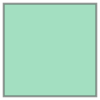

In [197]:
poly

In [186]:
#create a crop window for the 1911 shoreline data, this can be used for other years as well
from shapely.geometry import MultiLineString, Polygon

corp = Polygon([(-124.168153,46.858267), (-124.168153, 46.917317), (-124.087369, 46.917317), (-124.087369, 46.880483),(-124.097723,46.879295),(-124.091375,46.867738),(-124.091375,46.858267)])

In [191]:
for i in range(len(features_1911)):
    features_1911[i]['geometry']['coordinates']=MultiLineString(features_1911[i]['geometry']['coordinates']).intersection(corp)

In [306]:
features_1911[0]

{"geometry": {"coordinates": {"coordinates": [[-124.111813, 46.858267], [-124.11191, 46.858451], [-124.112076, 46.858816], [-124.112291, 46.859133], [-124.112374, 46.859322], [-124.112567, 46.859558], [-124.11287, 46.859861], [-124.113164, 46.860205], [-124.113297, 46.86038], [-124.113542, 46.860758], [-124.113747, 46.861075], [-124.113933, 46.86144], [-124.114148, 46.861805], [-124.114282, 46.862069], [-124.114405, 46.86223], [-124.114548, 46.862487], [-124.114673, 46.862764], [-124.114898, 46.863136], [-124.115185, 46.863561], [-124.11543, 46.863953], [-124.115726, 46.864344], [-124.115931, 46.864661], [-124.116187, 46.865086], [-124.116455, 46.8656], [-124.11665, 46.865931], [-124.116874, 46.866248], [-124.11707, 46.866579], [-124.117347, 46.867058], [-124.117635, 46.867558], [-124.117799, 46.867822], [-124.117943, 46.868099], [-124.11817, 46.868545], [-124.118501, 46.869214], [-124.118623, 46.869396], [-124.11878, 46.869748], [-124.119025, 46.870153], [-124.119271, 46.870524], [-12

In [235]:
len(features_1911)

9

In [234]:
#remove the empty features
for feature in features_1911:
    if feature['geometry']['coordinates'].is_empty==True:
        features_1911.remove(feature)

In [241]:
type(features_1911[3]['geometry']['coordinates'])

shapely.geometry.linestring.LineString

In [205]:
print(features_1911[0]['geometry']['coordinates'])

LINESTRING Z EMPTY


In [203]:
for feature in features_1911:
    if feature['geometry']['coordinates']["coordinates"]==[]:
        features_1911.remove(feature)

TypeError: 'LineString' object is not subscriptable

In [231]:
features_1911

[{"geometry": {"coordinates": {"coordinates": [[-124.111813, 46.858267], [-124.11191, 46.858451], [-124.112076, 46.858816], [-124.112291, 46.859133], [-124.112374, 46.859322], [-124.112567, 46.859558], [-124.11287, 46.859861], [-124.113164, 46.860205], [-124.113297, 46.86038], [-124.113542, 46.860758], [-124.113747, 46.861075], [-124.113933, 46.86144], [-124.114148, 46.861805], [-124.114282, 46.862069], [-124.114405, 46.86223], [-124.114548, 46.862487], [-124.114673, 46.862764], [-124.114898, 46.863136], [-124.115185, 46.863561], [-124.11543, 46.863953], [-124.115726, 46.864344], [-124.115931, 46.864661], [-124.116187, 46.865086], [-124.116455, 46.8656], [-124.11665, 46.865931], [-124.116874, 46.866248], [-124.11707, 46.866579], [-124.117347, 46.867058], [-124.117635, 46.867558], [-124.117799, 46.867822], [-124.117943, 46.868099], [-124.11817, 46.868545], [-124.118501, 46.869214], [-124.118623, 46.869396], [-124.11878, 46.869748], [-124.119025, 46.870153], [-124.119271, 46.870524], [-1

In [185]:
#test
from shapely.geometry import MultiLineString, Polygon

# Define the MultiLineString and Polygon geometries
mls = MultiLineString([((0, 0), (1, 1)), ((1, 1), (2, 2)), ((3, 3), (4, 4)), ((5, 5), (6, 6))])
poly = Polygon([(0.5, 0.5), (2.5, 0.5), (2.5, 2.5), (0.5, 2.5)])

# Intersect the MultiLineString with the Polygon
result = mls.intersection(poly)

# Print the resulting geometry
print(result)

MULTILINESTRING ((0.5 0.5, 1 1), (1 1, 2 2))


In [242]:
len(features_1911)

9

In [131]:
#test cell
len(features)

1

In [132]:
#write a code to convert the nested list of coordinates into LineString objects
def covert_to_line_str(features):
    list_line_str=[]
    for i in range(len(features)):
        list_line_str.append(LineString(features[i]['geometry']['coordinates'][0]))
    return list_line_str
line_str_1860=covert_to_line_str(features)

In [133]:
#line_str_1860

[<LINESTRING (-124.118 46.877, -124.118 46.878, -124.118 46.879, -124.118 46....>]

In [243]:
line_str_1911_test=[]
for feature in features_1911:
    line_str_1911_test.append(feature['geometry']['coordinates'])

In [244]:
line_str_1911_test

[<LINESTRING (-124.112 46.858, -124.112 46.858, -124.112 46.859, -124.112 46....>,
 <LINESTRING (-124.093 46.891, -124.093 46.891, -124.093 46.89, -124.093 46.8...>,
 <LINESTRING (-124.093 46.891, -124.093 46.891)>,
 <LINESTRING (-124.133 46.906, -124.132 46.906, -124.132 46.905)>,
 <LINESTRING (-124.098 46.904, -124.099 46.904, -124.099 46.904, -124.099 46....>,
 <LINESTRING (-124.097 46.904, -124.097 46.903, -124.097 46.903, -124.097 46....>,
 <LINESTRING (-124.096 46.9, -124.097 46.9, -124.097 46.9, -124.097 46.899, -...>,
 <LINESTRING (-124.132 46.905, -124.132 46.905, -124.132 46.905, -124.131 46....>,
 <LINESTRING (-124.097 46.904, -124.097 46.904, -124.097 46.904, -124.097 46....>]

In [245]:
len(line_str_1911_test)

9

In [246]:
len(line_str_1860)

1

In [134]:
line_str_1911=covert_to_line_str(features_1911)

In [135]:
#line_str_1911

[<LINESTRING (-124.027 46.9, -124.027 46.9)>,
 <LINESTRING (-124.009 46.911, -124.009 46.911, -124.009 46.911, -124.009 46....>,
 <LINESTRING (-124.13 46.948, -124.129 46.949)>,
 <LINESTRING (-124.129 46.949, -124.128 46.949, -124.128 46.949, -124.128 46....>,
 <LINESTRING (-124.122 46.958, -124.122 46.959, -124.122 46.959, -124.123 46....>,
 <LINESTRING (-124.12 46.955, -124.12 46.955, -124.12 46.955, -124.121 46.955...>,
 <LINESTRING (-124.093 46.877, -124.094 46.877, -124.094 46.877, -124.094 46....>,
 <LINESTRING (-123.999 46.903, -124 46.903, -124 46.903, -124 46.903, -124.00...>,
 <LINESTRING (-124.082 46.861, -124.082 46.861, -124.081 46.861, -124.081 46....>,
 <LINESTRING (-124.098 46.811, -124.098 46.811, -124.098 46.812, -124.098 46....>,
 <LINESTRING (-124.12 46.954, -124.12 46.954, -124.12 46.954, -124.12 46.954,...>,
 <LINESTRING (-124.127 46.952, -124.127 46.952, -124.127 46.952, -124.128 46....>,
 <LINESTRING (-124.133 46.962, -124.133 46.963, -124.133 46.963, -124.133 4

Now, we have converted the nested coordinates in the geojson file to a list of linestring objects.


We should also convert the transects_perp to a list of linestring objects.

In [281]:
#writing a function to convert the nested list of transects_perp into LineString objects
def covert_to_line_str_transects(transects_perp):
    transects_perp_line_str=[]
    for key in transects_perp.keys():
        for i in range(len(transects_perp[key])):

            transects_perp_line_str.append(LineString(transects_perp[key][i]))
    return transects_perp_line_str

transects_perp_line_str=covert_to_line_str_transects(transects_perp)

In [178]:
len(transects_perp_line_str)

325

In [307]:
transects_perp_line_str

[<LINESTRING (-124.109 46.859, -124.212 46.844)>,
 <LINESTRING (-124.109 46.859, -124.213 46.844)>,
 <LINESTRING (-124.109 46.86, -124.213 46.845)>,
 <LINESTRING (-124.109 46.86, -124.213 46.845)>,
 <LINESTRING (-124.11 46.86, -124.213 46.845)>,
 <LINESTRING (-124.11 46.86, -124.213 46.846)>,
 <LINESTRING (-124.11 46.861, -124.213 46.846)>,
 <LINESTRING (-124.11 46.861, -124.213 46.846)>,
 <LINESTRING (-124.11 46.861, -124.213 46.846)>,
 <LINESTRING (-124.11 46.862, -124.213 46.847)>,
 <LINESTRING (-124.11 46.862, -124.213 46.847)>,
 <LINESTRING (-124.11 46.862, -124.213 46.847)>,
 <LINESTRING (-124.11 46.862, -124.214 46.848)>,
 <LINESTRING (-124.11 46.863, -124.214 46.848)>,
 <LINESTRING (-124.11 46.863, -124.214 46.848)>,
 <LINESTRING (-124.111 46.863, -124.214 46.848)>,
 <LINESTRING (-124.111 46.864, -124.214 46.849)>,
 <LINESTRING (-124.111 46.864, -124.214 46.849)>,
 <LINESTRING (-124.111 46.864, -124.214 46.849)>,
 <LINESTRING (-124.111 46.864, -124.214 46.85)>,
 <LINESTRING (-1

the length of the transects_perp_line_str is also 325. Indicating that we should have done the right thing.

In [144]:
#transects_perp_line_str

[<LINESTRING (-124.109 46.859, -124.13 46.856)>,
 <LINESTRING (-124.109 46.859, -124.13 46.856)>,
 <LINESTRING (-124.109 46.86, -124.13 46.857)>,
 <LINESTRING (-124.109 46.86, -124.13 46.857)>,
 <LINESTRING (-124.11 46.86, -124.13 46.857)>,
 <LINESTRING (-124.11 46.86, -124.13 46.857)>,
 <LINESTRING (-124.11 46.861, -124.13 46.858)>,
 <LINESTRING (-124.11 46.861, -124.13 46.858)>,
 <LINESTRING (-124.11 46.861, -124.131 46.858)>,
 <LINESTRING (-124.11 46.862, -124.131 46.859)>,
 <LINESTRING (-124.11 46.862, -124.131 46.859)>,
 <LINESTRING (-124.11 46.862, -124.131 46.859)>,
 <LINESTRING (-124.11 46.862, -124.131 46.859)>,
 <LINESTRING (-124.11 46.863, -124.131 46.86)>,
 <LINESTRING (-124.11 46.863, -124.131 46.86)>,
 <LINESTRING (-124.111 46.863, -124.131 46.86)>,
 <LINESTRING (-124.111 46.864, -124.131 46.861)>,
 <LINESTRING (-124.111 46.864, -124.131 46.861)>,
 <LINESTRING (-124.111 46.864, -124.131 46.861)>,
 <LINESTRING (-124.111 46.864, -124.132 46.861)>,
 <LINESTRING (-124.111 46.

In [147]:
print(transects_perp_line_str[10])

LINESTRING (-124.11008877777778 46.86186366666667, -124.13074518768434 46.85889471119627)


In [148]:
print(transects_perp_line_str[11])

LINESTRING (-124.1101763030303 46.86215036363637, -124.13083282755483 46.8591814235699)


Now we have the transects, and we also have the shorelines, then we should move to find out the intersections of the transects and historical shorelines.

The objects we are going to feed into the function are line_str_1860, line_str_1911, and transects_perp_line_str. They are all list of linestring objects.

In [153]:
print(line_str_1860[0])

LINESTRING (-124.117626 46.877113, -124.117716 46.877859, -124.118055 46.878537, -124.118327 46.879171, -124.11853 46.879736, -124.118847 46.880573, -124.119186 46.88141, -124.119503 46.88245, -124.119684 46.883332, -124.119548 46.884304, -124.119706 46.885051, -124.119661 46.886001, -124.119751 46.887018, -124.119706 46.887606, -124.11939 46.888262, -124.119186 46.889167, -124.119209 46.889687, -124.118847 46.890162, -124.118824 46.891225, -124.118508 46.891926, -124.118168 46.892944, -124.117874 46.894391, -124.117445 46.895409, -124.116902 46.897127, -124.116088 46.898303, -124.115839 46.899095, -124.115126 46.900499, -124.114172 46.9017, -124.112971 46.902937, -124.111628 46.903997, -124.109897 46.90488, -124.108492 46.905178, -124.107246 46.905552, -124.106222 46.905799, -124.104843 46.906046, -124.103783 46.906011, -124.102653 46.905834, -124.101522 46.90541, -124.100568 46.905163, -124.099543 46.904704, -124.098589 46.904103, -124.097705 46.903396, -124.09714 46.902937, -124.096

## Caveat: If we find more than one intersection on the same shoreline, we will only keep the furthest one.

In [157]:
from shapely.geometry import Point, MultiPoint

In [263]:
#Here the shores_early is the shorelines that is earlier in year, 
def find_intersection(transect,shores_early,shores_late):
    transect_dict={}          #create a dictionary to store the intersection points of the transect with the shorelines
    first=Point(transect.coords[0])   # the start point of the transect
    tmp=[]
    i=0
    for shores_1 in shores_early:
        if transect.intersects(shores_1):
            #transect_dict["shores_early"]=transect.intersection(shores_1)
            if type(transect.intersection(shores_1))== MultiPoint:
            #num_points=len(transect_dict[str(shores_early)].geoms)
            #if num_points>1:
                distances=[first.distance(pt) for pt in list(transect.intersection(shores_1).geoms)] #find the distance between the start point and the intersection points
                furthest_point = max(zip(distances, list(transect.intersection(shores_1).geoms)))[1]
                tmp.append(furthest_point)
            else:
                tmp.append(transect.intersection(shores_1))
        else:
            i+=1
    if i==len(shores_early):
        transect_dict["shores_early"]="Did Not Intersect with early"
    else:
        distance=[first.distance(pt) for pt in tmp]
        furthest_point = max(zip(distance, tmp))[1]
        transect_dict["shores_early"]=furthest_point



    tmp=[]
    i=0
    for shores_2 in shores_late:



        if transect.intersects(shores_2):
            #tmp.append(transect.intersection(shores_2))
            #transect_dict["shores_late"]=transect.intersection(shores_2)
            if type(transect.intersection(shores_2))== MultiPoint:
            #num_points=len(transect_dict[str(shores_late)].geoms)
            #if num_points>1:
                distances=[first.distance(pt) for pt in list(transect.intersection(shores_2).geoms)]
                furthest_point = max(zip(distances, list(transect.intersection(shores_2).geoms)))[1]
                tmp.append(furthest_point)
            else:
                tmp.append(transect.intersection(shores_2))
        else:
            i=i+1
            #transect_dict["shores_late"]="Did Not Intersect with later"
    if i==len(shores_late):
        transect_dict["shores_late"]="Did Not Intersect with later"
    else:
        distance=[first.distance(pt) for pt in tmp]
        furthest_point = max(zip(distance, tmp))[1]
        transect_dict["shores_late"]=furthest_point
    return transect_dict

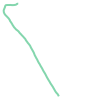

In [250]:
line_str_1911_test[0]

In [251]:
print(line_str_1911_test[0])

LINESTRING (-124.11181277272726 46.858267, -124.11191 46.858451, -124.112076 46.858816, -124.112291 46.859133, -124.112374 46.859322, -124.112567 46.859558, -124.11287 46.859861, -124.113164 46.860205, -124.113297 46.86038, -124.113542 46.860758, -124.113747 46.861075, -124.113933 46.86144, -124.114148 46.861805, -124.114282 46.862069, -124.114405 46.86223, -124.114548 46.862487, -124.114673 46.862764, -124.114898 46.863136, -124.115185 46.863561, -124.11543 46.863953, -124.115726 46.864344, -124.115931 46.864661, -124.116187 46.865086, -124.116455 46.8656, -124.11665 46.865931, -124.116874 46.866248, -124.11707 46.866579, -124.117347 46.867058, -124.117635 46.867558, -124.117799 46.867822, -124.117943 46.868099, -124.11817 46.868545, -124.118501 46.869214, -124.118623 46.869396, -124.11878 46.869748, -124.119025 46.870153, -124.119271 46.870524, -124.119517 46.870923, -124.119866 46.871537, -124.120104 46.872011, -124.120352 46.872504, -124.120885 46.873389, -124.121111 46.87376, -124

In [182]:
transects_perp_line_str

[<LINESTRING (-124.109 46.859, -124.212 46.844)>,
 <LINESTRING (-124.109 46.859, -124.213 46.844)>,
 <LINESTRING (-124.109 46.86, -124.213 46.845)>,
 <LINESTRING (-124.109 46.86, -124.213 46.845)>,
 <LINESTRING (-124.11 46.86, -124.213 46.845)>,
 <LINESTRING (-124.11 46.86, -124.213 46.846)>,
 <LINESTRING (-124.11 46.861, -124.213 46.846)>,
 <LINESTRING (-124.11 46.861, -124.213 46.846)>,
 <LINESTRING (-124.11 46.861, -124.213 46.846)>,
 <LINESTRING (-124.11 46.862, -124.213 46.847)>,
 <LINESTRING (-124.11 46.862, -124.213 46.847)>,
 <LINESTRING (-124.11 46.862, -124.213 46.847)>,
 <LINESTRING (-124.11 46.862, -124.214 46.848)>,
 <LINESTRING (-124.11 46.863, -124.214 46.848)>,
 <LINESTRING (-124.11 46.863, -124.214 46.848)>,
 <LINESTRING (-124.111 46.863, -124.214 46.848)>,
 <LINESTRING (-124.111 46.864, -124.214 46.849)>,
 <LINESTRING (-124.111 46.864, -124.214 46.849)>,
 <LINESTRING (-124.111 46.864, -124.214 46.849)>,
 <LINESTRING (-124.111 46.864, -124.214 46.85)>,
 <LINESTRING (-1

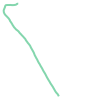

In [255]:
line_str_1911_test[0]

In [254]:
#test cell
# define a variable with a long name
print(line_str_1911_test[0])


LINESTRING (-124.11181277272726 46.858267, -124.11191 46.858451, -124.112076 46.858816, -124.112291 46.859133, -124.112374 46.859322, -124.112567 46.859558, -124.11287 46.859861, -124.113164 46.860205, -124.113297 46.86038, -124.113542 46.860758, -124.113747 46.861075, -124.113933 46.86144, -124.114148 46.861805, -124.114282 46.862069, -124.114405 46.86223, -124.114548 46.862487, -124.114673 46.862764, -124.114898 46.863136, -124.115185 46.863561, -124.11543 46.863953, -124.115726 46.864344, -124.115931 46.864661, -124.116187 46.865086, -124.116455 46.8656, -124.11665 46.865931, -124.116874 46.866248, -124.11707 46.866579, -124.117347 46.867058, -124.117635 46.867558, -124.117799 46.867822, -124.117943 46.868099, -124.11817 46.868545, -124.118501 46.869214, -124.118623 46.869396, -124.11878 46.869748, -124.119025 46.870153, -124.119271 46.870524, -124.119517 46.870923, -124.119866 46.871537, -124.120104 46.872011, -124.120352 46.872504, -124.120885 46.873389, -124.121111 46.87376, -124

In [253]:
print(transects_perp_line_str[30])

LINESTRING (-124.11183928282829 46.867597606060606, -124.21510998239916 46.85271708375213)


In [256]:
line_str_1911_test[0].intersects(transects_perp_line_str[30])

True

In [259]:
transects_perp_line_str[30].intersects(line_str_1911_test[0])

True

In [258]:
print(line_str_1911_test[0].intersection(transects_perp_line_str[30]))

POINT (-124.11721140535741 46.86682352406571)


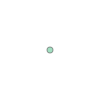

In [166]:
#test cell
Point(transects_perp_line_str[0].coords[0])

In [304]:
line_str_1860

[<LINESTRING (-124.118 46.877, -124.118 46.878, -124.118 46.879, -124.118 46....>]

In [282]:
i=0
#create a nested dictionary to store the intersection points of the transects with the shorelines
intersections_dict={}
for transectionlines in transects_perp_line_str:
    print(i)
    intersections_dict["tran_"+str(i)]=find_intersection(transectionlines,line_str_1860,line_str_1911_test)
    i=i+1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [283]:
intersections_dict

{'tran_0': {'shores_early': 'Did Not Intersect with early',
  'shores_late': <POINT (-124.112 46.859)>},
 'tran_1': {'shores_early': 'Did Not Intersect with early',
  'shores_late': <POINT (-124.112 46.859)>},
 'tran_2': {'shores_early': 'Did Not Intersect with early',
  'shores_late': <POINT (-124.112 46.859)>},
 'tran_3': {'shores_early': 'Did Not Intersect with early',
  'shores_late': <POINT (-124.112 46.859)>},
 'tran_4': {'shores_early': 'Did Not Intersect with early',
  'shores_late': <POINT (-124.113 46.86)>},
 'tran_5': {'shores_early': 'Did Not Intersect with early',
  'shores_late': <POINT (-124.113 46.86)>},
 'tran_6': {'shores_early': 'Did Not Intersect with early',
  'shores_late': <POINT (-124.113 46.86)>},
 'tran_7': {'shores_early': 'Did Not Intersect with early',
  'shores_late': <POINT (-124.113 46.86)>},
 'tran_8': {'shores_early': 'Did Not Intersect with early',
  'shores_late': <POINT (-124.114 46.861)>},
 'tran_9': {'shores_early': 'Did Not Intersect with early',

If we have multiple intersections, we will choose the one that is furthest to the transect.

[[[-124.027818, 46.900177],
  [-124.027981, 46.900067],
  [-124.028159, 46.899941],
  [-124.028436, 46.899815],
  [-124.028804, 46.899744],
  [-124.029271, 46.899641],
  [-124.029594, 46.899564],
  [-124.030221, 46.899348],
  [-124.03066, 46.89919],
  [-124.031006, 46.898902],
  [-124.031192, 46.898716],
  [-124.031358, 46.898442],
  [-124.031463, 46.898317],
  [-124.031561, 46.898224],
  [-124.031785, 46.898185],
  [-124.031938, 46.898134],
  [-124.032072, 46.898071],
  [-124.032206, 46.898027],
  [-124.032376, 46.897982],
  [-124.032483, 46.89787],
  [-124.032696, 46.897701],
  [-124.032918, 46.897563],
  [-124.033115, 46.897487],
  [-124.033249, 46.897393],
  [-124.033408, 46.897256],
  [-124.033496, 46.897125],
  [-124.033474, 46.896928],
  [-124.033397, 46.896675],
  [-124.033349, 46.896496],
  [-124.033346, 46.896348],
  [-124.033371, 46.896261],
  [-124.033423, 46.896149],
  [-124.033521, 46.896081],
  [-124.03362, 46.89608],
  [-124.033773, 46.896078],
  [-124.033954, 46.896114

In [287]:
#this function divides the intersection points on the transect into equal parts, the number of parts is equal to the number of years between the two shorelines
def shoreline_interpolation(year_start,year_end,intersections_dict):
    interpolated_shorelines={}
    for key in intersections_dict.keys():
        if intersections_dict[key]["shores_early"]!="Did Not Intersect with early" and intersections_dict[key]["shores_late"]!="Did Not Intersect with later":
            line=LineString([intersections_dict[key]["shores_early"],intersections_dict[key]["shores_late"]])
            intersections_dict[key]["interpolation"]=[line.interpolate((i+1)/(year_end - year_start), normalized=True) for i in range(year_end - year_start)]
        else:
            intersections_dict[key]["interpolation"]="Did not interpolate"

        
               


In [308]:
shoreline_interpolation(1860,1911,intersections_dict)

In [309]:
intersections_dict

{'tran_0': {'shores_early': 'Did Not Intersect with early',
  'shores_late': <POINT (-124.112 46.859)>,
  'interpolation': 'Did not interpolate'},
 'tran_1': {'shores_early': 'Did Not Intersect with early',
  'shores_late': <POINT (-124.112 46.859)>,
  'interpolation': 'Did not interpolate'},
 'tran_2': {'shores_early': 'Did Not Intersect with early',
  'shores_late': <POINT (-124.112 46.859)>,
  'interpolation': 'Did not interpolate'},
 'tran_3': {'shores_early': 'Did Not Intersect with early',
  'shores_late': <POINT (-124.112 46.859)>,
  'interpolation': 'Did not interpolate'},
 'tran_4': {'shores_early': 'Did Not Intersect with early',
  'shores_late': <POINT (-124.113 46.86)>,
  'interpolation': 'Did not interpolate'},
 'tran_5': {'shores_early': 'Did Not Intersect with early',
  'shores_late': <POINT (-124.113 46.86)>,
  'interpolation': 'Did not interpolate'},
 'tran_6': {'shores_early': 'Did Not Intersect with early',
  'shores_late': <POINT (-124.113 46.86)>,
  'interpolation'

In [291]:
len(intersections_dict["tran_95"]["interpolation"])

51

The interpolation includes the end point, but not the start point.

In [295]:
#this function creates a list of the interpolated shorelines for each year
def shoreline_estimated(year_start,year_end,intersections_dict):
    shorelines_estimated={}
    for year in range(year_start+1,year_end):
        tmp_shoreline=[]
        for key in intersections_dict.keys():
            if intersections_dict[key]["interpolation"] != "Did not interpolate":
                tmp_shoreline.append(intersections_dict[key]["interpolation"][year-year_start-1])
        shorelines_estimated["shore_"+str(year)]=LineString(tmp_shoreline)
    return shorelines_estimated

shores_1861_1910=shoreline_estimated(1860,1911,intersections_dict)

    


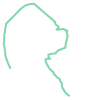

In [303]:
shores_1861_1910["shore_1867"]

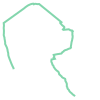

In [300]:
shores_1861_1910["shore_1875"]

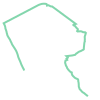

In [301]:
shores_1861_1910["shore_1890"]

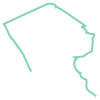

In [299]:
shores_1861_1910["shore_1901"]

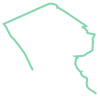

In [302]:
shores_1861_1910["shore_1905"]

In [286]:
from shapely.geometry import Point, LineString

# Define the two points
p1 = Point(0, 0)
p2 = Point(10, 10)

# Create a LineString object from the two points
line = LineString([p1, p2])

# Find the points that divide the line into 100 equal segments
divided_points = [line.interpolate((i+1)/100, normalized=True) for i in range(100)]

# Print the resulting points
for point in divided_points:
    print(point)


POINT (0.1 0.1)
POINT (0.2 0.2)
POINT (0.3 0.3)
POINT (0.4 0.4)
POINT (0.5 0.5)
POINT (0.6 0.6)
POINT (0.7000000000000001 0.7000000000000001)
POINT (0.8 0.8)
POINT (0.8999999999999999 0.8999999999999999)
POINT (1 1)
POINT (1.1 1.1)
POINT (1.2 1.2)
POINT (1.3 1.3)
POINT (1.4000000000000001 1.4000000000000001)
POINT (1.5 1.5)
POINT (1.6 1.6)
POINT (1.7000000000000002 1.7000000000000002)
POINT (1.7999999999999998 1.7999999999999998)
POINT (1.9 1.9)
POINT (2 2)
POINT (2.1 2.1)
POINT (2.2 2.2)
POINT (2.3000000000000003 2.3000000000000003)
POINT (2.4 2.4)
POINT (2.5 2.5)
POINT (2.6 2.6)
POINT (2.7 2.7)
POINT (2.8000000000000003 2.8000000000000003)
POINT (2.9 2.9)
POINT (3 3)
POINT (3.1 3.1)
POINT (3.2 3.2)
POINT (3.3000000000000003 3.3000000000000003)
POINT (3.4000000000000004 3.4000000000000004)
POINT (3.5 3.5)
POINT (3.5999999999999996 3.5999999999999996)
POINT (3.7 3.7)
POINT (3.8 3.8)
POINT (3.9000000000000004 3.9000000000000004)
POINT (4 4)
POINT (4.1 4.1)
POINT (4.2 4.2)
POINT (4.3 4.3

LINESTRING (-124.027818 46.900177, -124.027981 46.900067, -124.028159 46.899941, -124.028436 46.899815, -124.028804 46.899744, -124.029271 46.899641, -124.029594 46.899564, -124.030221 46.899348, -124.03066 46.89919, -124.031006 46.898902, -124.031192 46.898716, -124.031358 46.898442, -124.031463 46.898317, -124.031561 46.898224, -124.031785 46.898185, -124.031938 46.898134, -124.032072 46.898071, -124.032206 46.898027, -124.032376 46.897982, -124.032483 46.89787, -124.032696 46.897701, -124.032918 46.897563, -124.033115 46.897487, -124.033249 46.897393, -124.033408 46.897256, -124.033496 46.897125, -124.033474 46.896928, -124.033397 46.896675, -124.033349 46.896496, -124.033346 46.896348, -124.033371 46.896261, -124.033423 46.896149, -124.033521 46.896081, -124.03362 46.89608, -124.033773 46.896078, -124.033954 46.896114, -124.034227 46.89621, -124.034616 46.896312, -124.034824 46.896366, -124.035032 46.896401, -124.035231 46.896411, -124.035438 46.896409, -124.035806 46.896319, -124.

[-124.027818, 46.900177]